In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

%matplotlib inline



In [2]:
df=pd.read_csv('data/boston.csv')
print(df.describe)

<bound method NDFrame.describe of          CRIM   ZN   INDUS   CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0     0.00632  18.0    2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0    7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.02729   0.0    7.07     0  0.469  7.185   61.1  4.9671    2  242   
3     0.03237   0.0    2.18     0  0.458  6.998   45.8  6.0622    3  222   
4     0.06905   0.0    2.18     0  0.458  7.147   54.2  6.0622    3  222   
5     0.02985   0.0    2.18     0  0.458  6.430   58.7  6.0622    3  222   
6     0.08829  12.5    7.87     0  0.524  6.012   66.6  5.5605    5  311   
7     0.14455  12.5    7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12.5    7.87     0  0.524  5.631  100.0  6.0821    5  311   
9     0.17004  12.5    7.87     0  0.524  6.004   85.9  6.5921    5  311   
10    0.22489  12.5    7.87     0  0.524  6.377   94.3  6.3467    5  311   
11    0.11747  12.5    7.87     0  0.524  6.009   82.9

In [3]:
df.values
df=np.array(df)

In [4]:
for i in range(12):
    df[:,i]=(df[:,i]-df[:,i].min())/(df[:,i].max()-df[:,i].min())

In [5]:
x_data=df[:,0:12]
y_data=df[:,12]

In [6]:
x=tf.placeholder(tf.float32,[None,12],name="X")
y=tf.placeholder(tf.float32,[None,1],name="Y")

In [7]:
with tf.name_scope('Model'):
    w=tf.Variable(tf.random_normal([12,1],stddev=0.01),name='W')
    b=tf.Variable(1.0,name='b')
    def model(x,w,b):
        return tf.matmul(x,w)+b
    pred=model(x,w,b)

In [8]:
train_epochs=50
learning_rate=0.01

In [9]:
with tf.name_scope('LossFunction'):
    loss_function=tf.reduce_mean(tf.pow(y-pred,2))
    optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [10]:
#声明会话
sess=tf.Session()
init=tf.global_variables_initializer()


In [11]:
#为TensorBoard可视化准备数据
logdir='I:\YMipny\Tensorboard1\log'

#创建一个操作，用于记录loss，后面再TB中SCALARS栏可见
sum_loss_op=tf.summary.scalar('loss',loss_function)

#把所有需要记录的摘要日志文件合并，方便一次性写入
merged=tf.summary.merge_all()

In [12]:
#启动会话
sess.run(init)

#创建摘要writer，将计算图写入摘要文件，后面再TB中GRSPHS栏可见
writer=tf.summary.FileWriter(logdir,sess.graph)

In [13]:
loss_list=[]
for epoch in range(train_epochs):
    loss_sum=0.0
    for xs,ys in zip(x_data,y_data):
        xs=xs.reshape(1,12)
        ys=ys.reshape(1,1)
        _,summary_str,loss=sess.run([optimizer,sum_loss_op,loss_function],feed_dict={x:xs,y:ys})
        writer.add_summary(summary_str,epoch)
        loss_sum=loss_sum+loss
        
    x_data,y_data=shuffle(x_data,y_data)
    
    b0temp=b.eval(session=sess)#!!!
    #w0temp=w.eval(session=sess)
    w0temp=sess.run(w)
    loss_average=loss_sum/len(y_data)
    loss_list.append(loss_average)#每轮添加一次
    print('epoch=',epoch+1,'loss=',loss_average,'b=',b0temp,'w=',w0temp)
#     plt.plot(x_data,w0temp*x_data+b0temp)

epoch= 1 loss= 60.6672696289 b= 10.9693 w= [[ -8.41496110e-01]
 [  2.93056417e+00]
 [  8.70745629e-03]
 [  7.65437126e-01]
 [  1.44915128e+00]
 [  9.71900558e+00]
 [  2.88801146e+00]
 [  3.07648444e+00]
 [  5.98260641e-01]
 [  1.86844736e-01]
 [  1.25564301e+00]
 [ -3.88111973e+00]]
epoch= 2 loss= 46.9285516754 b= 16.4562 w= [[ -2.23917174]
 [  5.38067007]
 [ -1.83133948]
 [  3.25138974]
 [  0.09706955]
 [ 16.76371765]
 [  2.67737532]
 [  4.19420242]
 [ -1.52930439]
 [ -2.82339859]
 [ -1.25099707]
 [ -8.81865597]]
epoch= 3 loss= 35.3401023353 b= 17.3904 w= [[ -2.56360865]
 [  4.541399  ]
 [ -1.35974121]
 [  4.2375474 ]
 [  0.35918   ]
 [ 19.18407631]
 [  3.00512671]
 [  1.93037367]
 [  0.168175  ]
 [ -2.47659516]
 [ -3.18226004]
 [-11.50008297]]
epoch= 4 loss= 30.9043830457 b= 18.1879 w= [[ -3.11888885]
 [  4.12494516]
 [ -1.69463408]
 [  4.03175068]
 [ -0.44304165]
 [ 21.06735802]
 [  2.51711988]
 [  0.54331607]
 [  0.21757324]
 [ -3.33762169]
 [ -4.54706001]
 [-13.85531235]]
epoch= 5

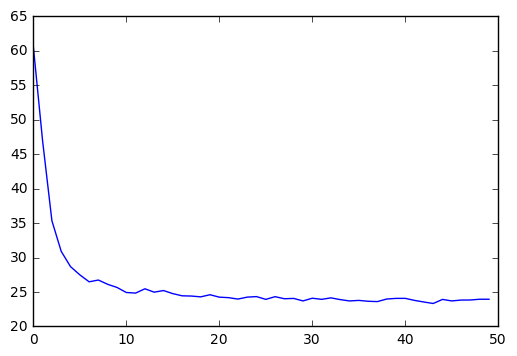

In [14]:
plt.plot(loss_list)

In [15]:
n=np.random.randint(506)
print(n)
x_test=x_data[n]
x_test=x_test.reshape(1,12)
predict=sess.run(pred,feed_dict={x:x_test})
print('预测值：%f'% predict)
target=y_data[n]
print('标签值：%f'% target)

285
预测值：15.491106
标签值：14.800000
